In [1]:
import excursion.utils as utils
from excursion import get_gp
import excursion.optimize as optimize
import numpy as np
import scipy.stats
import excursion.plotting.twodim as plots
import os
np.warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
def plot_and_save(workdir, index, *args,**kwargs):
    fig, axarr = plt.subplots(1, 3, sharey=True)
    fig.set_size_inches(9.5, 3.5)
    plt.title('Iteration {}'.format(index))
    plots.plot(axarr,gps,X,y_list,scandetails, **kwargs)
    plt.tight_layout()
    plt.savefig(os.path.join(workdir,'update_{}.png'.format(str(index).zfill(3))), bbox_inches = 'tight')
    plt.show()

import excursion.testcases.fast as scandetails

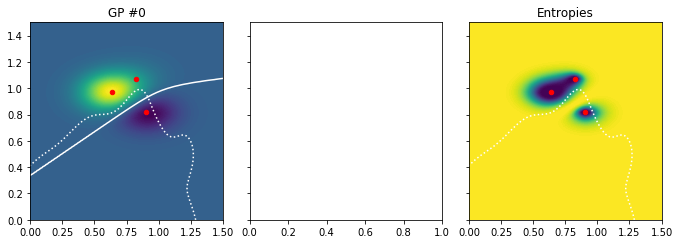

Iteration 1. new x: [[1.2   0.975]
 [0.75  1.275]
 [0.75  0.6  ]
 [0.375 0.75 ]
 [0.075 0.75 ]
 [1.425 0.75 ]
 [0.75  0.375]
 [0.75  0.15 ]
 [1.05  1.125]
 [0.975 0.3  ]
 [0.225 0.75 ]
 [0.9   0.75 ]
 [0.3   1.125]
 [0.225 0.3  ]
 [1.35  0.15 ]
 [0.225 1.425]
 [1.275 1.425]
 [0.225 0.075]
 [1.35  0.45 ]
 [0.3   0.525]
 [0.075 1.125]
 [0.675 1.5  ]
 [1.05  0.   ]
 [0.975 0.825]
 [1.425 1.125]
 [0.075 0.3  ]
 [0.75  0.75 ]
 [0.525 0.15 ]
 [0.975 1.425]
 [0.45  1.35 ]]
Iteration 1. Evaluted function 0 to values: [  1.77952104   6.79237612  -5.24085038   0.9419458    8.6888617
   5.06883406  -6.93547546  -7.83189905   3.06113641  -2.68082508
   6.31737778  -2.23932534   8.95787515  -8.6347701    2.61807418
   8.98718812   5.32310162 -13.92010252   2.11418236  -4.59455984
   8.9871254    8.93302118  -2.07608193   0.30649722   5.21841655
  -7.06391695  -2.64853915 -10.99614889   7.08784323   8.97510029]


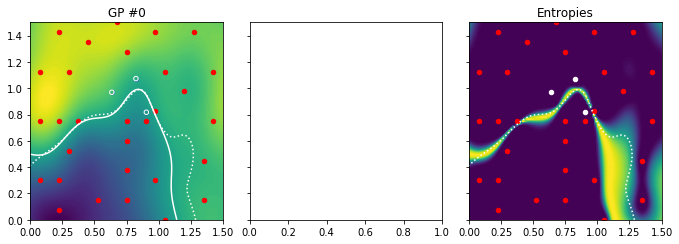

Iteration 2. new x: [[1.2   0.375]
 [1.5   0.3  ]
 [0.6   0.825]
 [1.2   0.675]
 [1.2   0.075]
 [0.075 0.525]
 [1.5   1.425]
 [0.6   0.75 ]
 [0.15  0.525]
 [1.05  0.15 ]
 [0.    1.425]
 [0.    0.45 ]
 [0.525 0.75 ]
 [0.975 0.75 ]
 [1.425 0.   ]
 [0.75  0.975]
 [0.9   0.975]
 [1.275 1.2  ]
 [1.5   0.975]
 [1.125 0.9  ]
 [1.35  0.9  ]
 [0.975 0.525]
 [1.125 1.5  ]
 [0.675 0.825]
 [0.45  0.75 ]
 [0.75  0.9  ]
 [0.825 0.975]
 [0.225 0.525]
 [1.275 0.3  ]
 [1.125 0.   ]]
Iteration 2. Evaluted function 0 to values: [-0.46575738  5.57882455  0.47626439  0.26863912 -0.77638641  2.21105389
  7.15103022 -1.26652407 -0.14432006 -1.06867281  8.98719681  1.84515142
 -1.34983819 -0.46789797  3.94424812  0.96641088  0.15038292  2.89450131
  6.01700244  2.00138038  3.78299927 -2.69859973  7.00636338 -0.19182127
 -0.88834854 -0.15838927 -0.09865172 -2.24720045  0.66099167 -1.39611234]


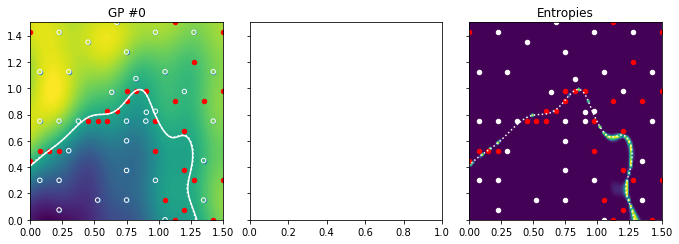

In [10]:
N_INIT  = 3
N_BATCH = 30
X,y_list,gps = optimize.init(scandetails, seed = 0, n_init=N_INIT)

N_UPDATES = 2


workdir = datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S-2dmulti')
os.mkdir(workdir)
plot_and_save(workdir, 0, gps,X,y_list,scandetails, batchsize = N_INIT)
for index in range(1,N_UPDATES+1):
    newx, acqvals = optimize.gridsearch(gps, X, scandetails, batchsize=N_BATCH, resampling_frac=1.0)

    print('Iteration {}. new x: {}'.format(index, newx))
    newys_list = [func(newx) for func in scandetails.truth_functions]
    for i,newys in enumerate(newys_list):
        print('Iteration {}. Evaluted function {} to values: {}'.format(index, i,newys))
        y_list[i] = np.concatenate([y_list[i],newys])
    X = np.concatenate([X,newx])
    
    gps = [get_gp(X,y_list[i]) for i in range(len(scandetails.truth_functions))]
    plot_and_save(workdir, index, gps,X,y_list,scandetails, batchsize=N_BATCH)
